## Background: 
Companies are always looking for ways to enhance their culture and environment. Achieving a high rate of general employee satisfaction can be quite the challenge. Further, how can a company determine factors that contribute to attrition, and how can they deter those factors? This is a question we are going to explore in this analysis.

## Data:
The dataset I chose for the Research Proposal is related to IBM Employee Attrition data. It is a fictional dataset created by data scientists at IBM. The dataset has 1470 obversations and 35 columns. The specific columns of interest in this research proposal are primarily Business Travel, Attrition, Job Role and Attrition Rate (created). The dataset itself was available for download via Kaggle at the following link:

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Attrition Rate:** Attrition is defined as reduction in numbers usually as a result of resignation, retirement, or death. The attrition rate would be the percentage of attrition within a particular subset of the data. By exploring the dataset, my hope is to determine a basis for a research proposal. Specifically, I want to design an experiment which could uncover contributing factors to attrition rate at IBM. After conducting preliminary exploratory analysis, the experiement will be described in detail below.

In [3]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
attrition = pd.read_csv('IBM_Attrition.csv')

In [5]:
#Get a feel for how large the dataset is
attrition.shape

(1470, 35)

In [6]:
#Get a feel for the actual data, show all columns
pd.options.display.max_columns = 50
attrition.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
#Continue to understand the variables in the dataset
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Analysis
The analysis below seeks to explore our dataset, using both univariate and bivariate methods, to find patterns or observations that form the basis of an experiment. After each plot, I have included a quick debrief and an indication as to whether or not it contributes to the final experiment design.

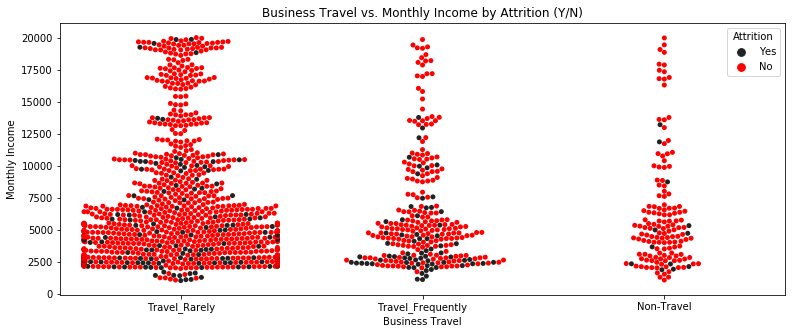

In [16]:
#Plot swarm plot showing business travel vs. monthly income by attrition

plt.figure(figsize=[13,5])
plt.title('Business Travel vs. Monthly Income by Attrition (Y/N)')
axis = sns.swarmplot(x="BusinessTravel", y="MonthlyIncome", hue="Attrition", data=attrition, color='r')
axis.set(xlabel='Business Travel', ylabel='Monthly Income')

plt.show()

**Takeaway:** There seems to be a very strong custer of attrition within the "Travel_Frequently" category at the lower income level.

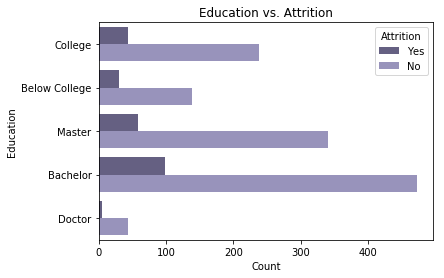

In [10]:
#Education level vs. Attrition

attrition['Education'].replace([1, 2, 3, 4, 5],
['Below College', 'College', 'Bachelor', 'Master', 'Doctor'], inplace = True)
sns.countplot(y="Education", hue="Attrition", data=attrition, palette="Purples_d")
plt.title('Education vs. Attrition')
plt.xlabel('Count')

plt.show()

**Takeaway:** Nothing particular stands out here, other than the fact that the ratio of attrition to non-attrition within each education level seems proportionate. Not much to investigate further, in my opinion.

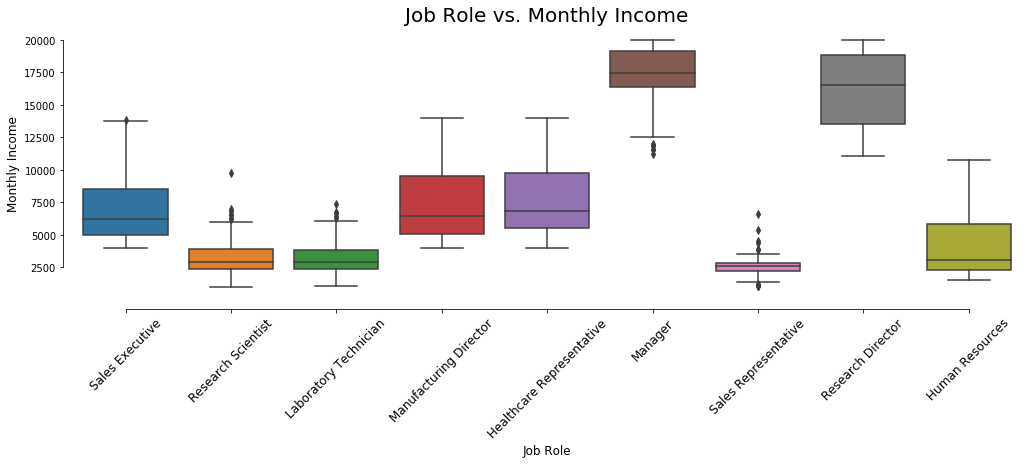

In [13]:
# Boxplot of monthly income by job role, want to specifically see how
#Sales representative fits in.

plt.figure(figsize=[17,5])
ax = sns.boxplot(x='JobRole',y='MonthlyIncome', data=attrition)  
plt.title('Job Role vs. Monthly Income', fontsize=20)
sns.despine(offset=10, trim=True)
ax.set(xlabel='Job Role', ylabel='Monthly Income')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.xlabel('Job Role', fontsize=12)

plt.show()

**Takeaway:** The research scientist, laboratory technician, and sales representative roles stand out as being significantly different than the rest. Later, I will investigate job role by attrition; it will be interesting to see if these particular roles register higher attrition with monthly income as a factor.

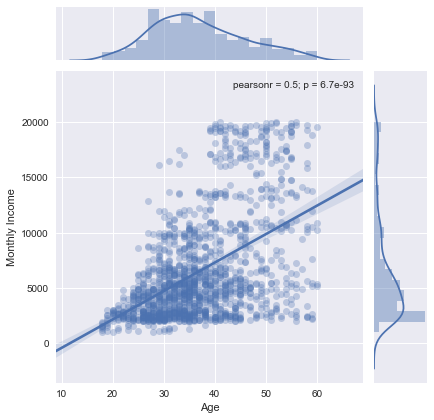

In [117]:
#Now look at age and income using a scatter plot with a line
#to understand the characteristics of our population

sns.jointplot(x="Age", y="MonthlyIncome", data=attrition, kind="reg",
               scatter_kws={'alpha':0.3}) # Set points to semi-transparent to see overlaping points.
plt.xlabel('Age')
plt.ylabel('Monthly Income')

plt.show()

**Takeaway:** The age distribution does not stand out, but the monthly income distribution does. Very skewed distribution, perhaps linked to individuals in some of the roles we previously saw.

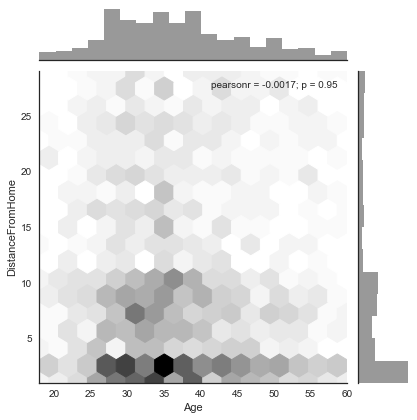

In [131]:
#Calculate distance from home vs. age

with sns.axes_style("white"):
    sns.jointplot(x='Age', y='DistanceFromHome', kind="hex", color="k", data=attrition)

**Takeaway:** The main finding here is that the majority of employees do not work far from home. This is clearly seen by the skewed distribution on the right side of the plot.

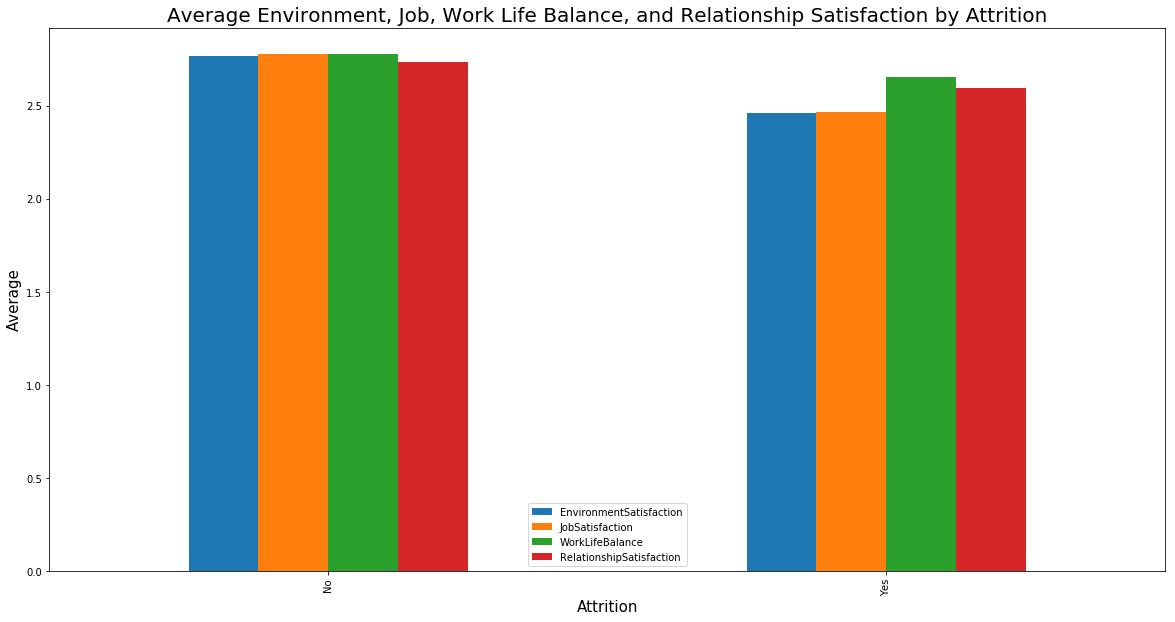

In [14]:
#Look at environment, job, work life balance, relationship satisfaction by attrition
attrition[['Attrition', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction']].groupby('Attrition').mean().plot.bar(figsize=(20, 10))
plt.title('Average Environment, Job, Work Life Balance, and Relationship Satisfaction by Attrition', fontsize = 20)
plt.ylabel('Average', fontsize=15)
plt.xlabel('Attrition', fontsize=15)

plt.show()

**Takeaway:** When looking at those who were attrited, overall satisfaction levels, from environment to relationship, were lower. These may serve as solid secondary metrics.

In [155]:
# Let's calculate attrition rate by job role

attrition_job_role = attrition[['JobRole', 'Attrition']].groupby('JobRole').agg({'Attrition': 'value_counts'}).add_suffix('_count').reset_index()
attrition_job_role = pd.merge(attrition_job_role, attrition_job_role.groupby('JobRole').sum().reset_index(), on='JobRole')
attrition_job_role['Attrition Rate'] = attrition_job_role['Attrition_count_x']/attrition_job_role['Attrition_count_y']*100

#Confirm this worked
attrition_job_role.head(5)

,JobRole,Attrition,Attrition_count_x,Attrition_count_y,Attrition Rate
0,Healthcare Representative,No,122,131,93.129771
1,Healthcare Representative,Yes,9,131,6.870229
2,Human Resources,No,40,52,76.923077
3,Human Resources,Yes,12,52,23.076923
4,Laboratory Technician,No,197,259,76.061776


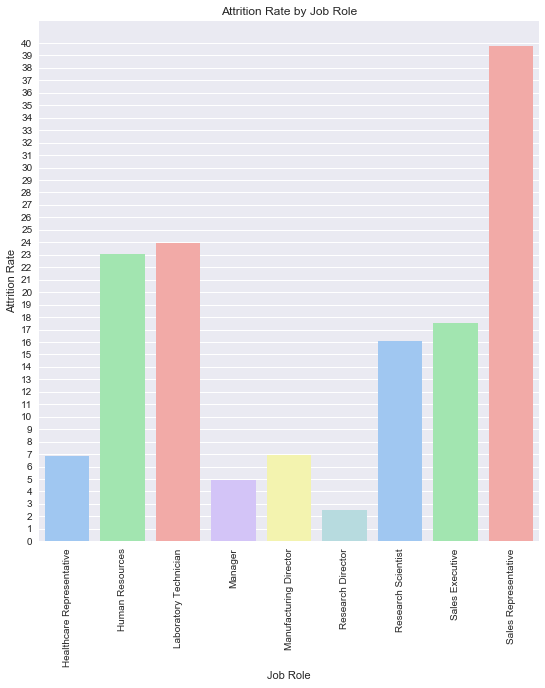

In [126]:
# Now plot the attrition rate for job role by business travel category, first create a 
#dataframe with only Attrition = 'Yes'

attrition_job_role = attrition_job_role[attrition_job_role['Attrition'] == 'Yes']

#Plot
sns.set(style="darkgrid")
g = sns.factorplot(x="JobRole", y="Attrition Rate", data=attrition_job_role,
                   size=8, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Attrition Rate")
g.set_xlabels("Job Role")
plt.title('Attrition Rate by Job Role')
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 41, 1))

plt.show()

**Takeaway:** The concept of attrition rate may end up forming the basis of the experiment, based on the plot above. Clearly, we see certain roles jump out as having the highest attrition rates. Maybe we can look at attrition rate in relation to other variables.

In [157]:
#Now, let's calculate attrition rate by business travel category

attrition_business_travel = attrition[['BusinessTravel', 'Attrition']].groupby('BusinessTravel').agg({'Attrition': 'value_counts'}).add_suffix('_count').reset_index()
attrition_business_travel = pd.merge(attrition_business_travel, attrition_business_travel.groupby('BusinessTravel').sum().reset_index(), on='BusinessTravel')
attrition_business_travel['Attrition Rate'] = attrition_business_travel['Attrition_count_x']/attrition_business_travel['Attrition_count_y']*100

#Confirm this worked
attrition_business_travel

,BusinessTravel,Attrition,Attrition_count_x,Attrition_count_y,Attrition Rate
0,Non-Travel,No,138,150,92.000000
1,Non-Travel,Yes,12,150,8.000000
2,Travel_Frequently,No,208,277,75.090253
3,Travel_Frequently,Yes,69,277,24.909747
4,Travel_Rarely,No,887,1043,85.043145
5,Travel_Rarely,Yes,156,1043,14.956855


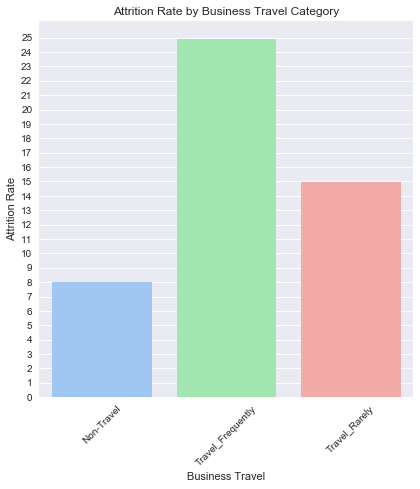

In [124]:
# Now plot the attrition rate by business travel category, first create a dataframe with only
# Attrition = 'Yes'

attrition_frequent_travel = attrition_business_travel[attrition_business_travel['Attrition'] == 'Yes']

#Plot
sns.set(style="darkgrid")
g = sns.factorplot(x="BusinessTravel", y="Attrition Rate", data=attrition_frequent_travel,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Attrition Rate")
g.set_xlabels("Business Travel")
plt.title('Attrition Rate by Business Travel Category')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 26, 1))

plt.show()

**Takeaway:** This may be the most telling plot thus far. Attrition rate is signficantly higher amongst those who travel, whether it be frequently or even rarely.

In [145]:
#Convert 'BusinessTravel' from categorical to numeric
attrition_business_travel.BusinessTravel = pd.Categorical(attrition_business_travel.BusinessTravel).codes

#Confirm this worked
attrition_business_travel

,BusinessTravel,Attrition,Attrition_count_x,Attrition_count_y,Attrition Rate
0,0,No,138,150,92.000000
1,0,Yes,12,150,8.000000
2,2,No,208,277,75.090253
3,2,Yes,69,277,24.909747
4,1,No,887,1043,85.043145
5,1,Yes,156,1043,14.956855


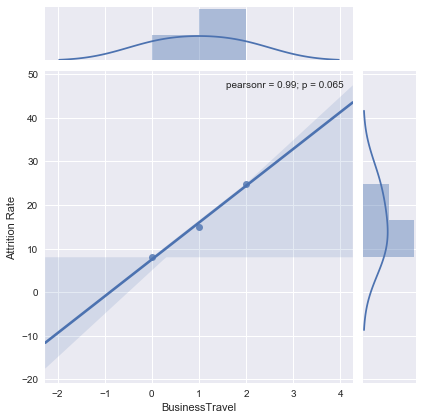

In [154]:
#Determine the correlation between Business Travel and Attrition Rate

attrition_business_travel_yes = attrition_business_travel[attrition_business_travel['Attrition'] == 'Yes']
sns.jointplot(x="BusinessTravel", y="Attrition Rate", data=attrition_business_travel_yes, kind='reg')
plt.show()

**Takeaway:** Attrition rate by Business Travel has a strong correlation and will form the basis of our experiment below.

# Experimental Design

## Solution:
Based on my findings from the exploratory analysis above, it seems that attrition rates are higher for those employees who travel. IBM wants to uncover why attrition may be higher for these particular conditions and have asked their data science team to conduct an experiment to potentially causality. The experiment to be conducted will be randomly assigning non-travel based work assignments (treatment) for 25 employees coming off a travel based assignment over the next year and randomly selecting 25 employees who currently hold a long term, travel based work assignment (control) during the same time frame.

## Hypothesis:
Reduction in travel will lower the overall numbers of attrition.

## Sample Selection:
Treatment will be randomly applied to 25 employees and the control will be a random selection of 25 employees.

## Treatment
**Control** - Random selection of employees who currently have long term travel based assignment.

**Treatment** - Random assignment of non-travel based assignment for employees who previously had travel based assignment.

## Rollout & Evaluation Plan: 
The participating inidividuals selected for the treatment group will be randomly chosen based on the end of their current assignment. The control group can be randomly selected among the population of employees who have a long term, travel based assignment. Based on this information, the rollout is classified as gradual. The intention is to "treat" 25 employees with this new work assignment and the duration of the project should be 1 year from when the new assignment began. The reason for this gradual rollout is not only based on the fact that employees have current ongoing obligations, but also due to the fact that if for some reason there are immediate negative consequences, the experiment can be paused or ended.

**Data Collection**
1. Conduct employee survey toward the end of the year long assignment for both groups
2. In addition to collecting the fields in the initial survey, collect aggregated attrition rate at the business travel level, as well number of days spent traveling for each employee in both groups.

**Metrics**
1. Attrition Rate
2. Business Travel
3. Number of days traveled
4. Job Satisfaction
5. Environment Satisfaction
6. Relationship Satisfaction
7. Work Life Balance

**Success Criteria** - 
Our success metric will be **attrition rate**. Specifically, based on the results in our post-assignment survey, we want to observe a 50% reduction in attrition rate in our treatment group. If this criteria is satisfied, IBM should strongly consider moving to teleconferencing mediums in place of physical travel.